# Information

*   **Author:** Erick Andrés Obregón Fonseca
*   **Career:** Computer Engineering
*   **Email:** erickobregonf@gmail.com
*   **Github:** [ErickOF](https://github.com/ErickOF)
*   **Google Colab Code:** [Code](https://colab.research.google.com/drive/11Rnm7eITKN_uGF0kkI-fl9B6Ml8GHQxC)

## Versions
### v1.0.0 (december 2018)
*   Fourier series plotter (real and approach)

### v1.0.1 (december 2018)
*   Optimized

### v1.1.0 (january 2019)
*   Amplitude and phase spectrum

### v2.1.0 (july 2019)
*   Fourier series solver based on Latex functions syntax, without simplified coefficients
*   Only continuous functions 

### v2.2.0 (july 2019)
*   Fourier series solver based on Latex functions syntax, with simplified coefficients
*   Now piecewise functions are available
*   Only constants functions

### v2.2.1 (july 2019)
*   Fourier series solver based on Latex functions syntax, with simplified coefficients and functions

### v2.2.2 (july 2019)
*   Now rational, logarithmic, exponential, trigonometric, inverse trigonometric and polynomial functions are available (I guess anyone :c, I need to test)

### v2.2.3 (july 2019)
*   The period of the function, the functions and the intervals are now entered by console



# Install modules

In [15]:
!pip install sympy==1.2

# Modules

In [0]:
from google.colab.output._publish import javascript

import matplotlib.pyplot as plt

import numpy as np
import numpy.matlib as matlib

import sympy
from sympy.abc import k, n, t
from sympy import cos, sin, Sum,  oo
from sympy import lambdify, simplify, symbols, sympify
from sympy.utilities.lambdify import lambdastr

# Settings

In [0]:
def custom_latex_printer(exp,**options):
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sympy.printing.latex(exp,**options)

sympy.init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)

# Fourier Series Solver

##  Fourier Sine and Cosine Series

$f(t) = a_0 + \sum_{n=1}^\infty [a_n \cos (w_0 t) + b_n \sin (w_0 t)]$

$a_0 = \frac{1}{T} \int_{t_0}^{t_0 + T} f(t) dt$

$a_n = \frac{2}{T} \int_{t_0}^{t_0 + T} f(t) cos (n w_0 t) dt$

$b_n = \frac{2}{T} \int_{t_0}^{t_0 + T} f(t) sin (n w_0 t) dt$

## Params

* *T:* Period
* *funtions:* Iterable with each part of the function
* *limits:* Iterable with the ranges of each part of the function

In [0]:
class FourierSerieSolver:
  
  def solve_sin_cos(self, T, funtions, limits=None):
    if isinstance(funtions, (list, tuple)) and isinstance(funtions, (list, tuple)):
      if len(funtions) == len(limits):
        # w0
        pi = sympy.Symbol('pi')
        w0 = 2*pi/T
        
        # a0
        a0, an, bn = 0, 0, 0
        
        for f, lim in zip(funtions, limits):
          a0 += 1/T * sympy.integrate(f, (t, lim[0], lim[1]))
          an += 2/T * sympy.integrate(f*cos(n*t*w0), (t, lim[0], lim[1]), conds='separate')
          bn += 2/T * sympy.integrate(f*sin(n*t*w0), (t, lim[0], lim[1]), conds='separate')
        
        # Simplify
        an = simplify(an.subs(cos(2*n*pi), 1).subs(sin(2*n*pi), 0).subs(cos(n*pi), (-1)**n).subs(sin(n*pi), 0))
        bn = simplify(bn.subs(cos(2*n*pi), 1).subs(sin(2*n*pi), 0).subs(cos(n*pi), (-1)**n).subs(sin(n*pi), 0))
        f_t = simplify(a0 + Sum(an*cos(n*w0*t) + bn*sin(n*w0*t), (n, 1, oo)))
        
        return a0, an, bn, f_t
      else:
        raise ValueError('Functions and limits size doesn\'t match.')
    else:
      raise ValueError('Functions and limits must be a iterable.')

# Fourier Series Plotter

In [0]:
class FourierSeriePlotter:
    def __init__(self, T, start=None, end=None, step=None):
        """
        T     - Period
        a0    - CD component
        start - Initial value for time. Default value -2*T
        end   - Final value for time. Default value 2*T
        step  - Step by step in time. Default value 0.001
        """
        # Period
        self.__T = T
        
        # Angular frecuency
        self.__w = (2*np.pi)/self.__T
        
        # Time
        if (start == None):
            start = -2*T
        if (end == None):
            end = 2*T
        if (step == None):
            step = 0.01
        
        N = (end - start)/step
        self.__t = np.linspace(start, end, N)
    
    def sin_cos_serie(self, a0, ak_exp, bk_exp):
        ak_f = lambdify(ak_exp.free_symbols, ak_exp, 'numpy')
        bk_f = lambdify(bk_exp.free_symbols, bk_exp, 'numpy')
        
        y = a0
        N = 10000

        for k in range(1, N + 1):
            # ak
            ak = 0
            if len(ak_exp.free_symbols) == 2:
              ak = ak_f(np.pi, k)
            # bk
            bk = 0
            if len(bk_exp.free_symbols) == 2:
              bk = bk_f(np.pi, k)
            
            y += ak*np.cos(self.__w*k*self.__t) + bk*np.sin(self.__w*k*self.__t)

        return self.__t, y

    def sin_cos_serie_aprox(self, a0, ak_exp, bk_exp, N=50):
        ak_f = lambdify(ak_exp.free_symbols, ak_exp, 'numpy')
        bk_f = lambdify(bk_exp.free_symbols, bk_exp, 'numpy')
        
        # Approach
        y = a0
        # Amplitude Spectrum
        an = np.zeros(N)
        # Phase Spectrum
        phi = np.zeros(N)

        wk = self.__w*np.array(range(1, N + 1))

        for k in range(1, N + 1):
            # ak
            ak = 0
            if len(ak_exp.free_symbols) == 2:
              ak = ak_f(np.pi, k)
            # bk
            bk = 0
            if len(bk_exp.free_symbols) == 2:
              bk = bk_f(np.pi, k)
            
            y += ak*np.cos(wk[k - 1]*self.__t) + bk*np.sin(wk[k - 1]*self.__t)
            
            an[k - 1] = np.sqrt(ak**2 + bk**2)
        
            if (ak == 0 and bk == 0) or (ak < 0 and bk == 0):
                phi[k - 1] = 0
            elif ak >= 0 and bk == 0:
                phi[k - 1] = 180
            elif ak == 0 and bk > 0:
                phi[k - 1] = -90
            elif ak == 0 and bk < 0:
                phi[k - 1] = 90
            else:
                phi[k - 1] = -np.arctan(bk/ak)*180/np.pi
                
                if ak > 0 and bk > 0:
                    phi[k - 1] += 180
                elif ak < 0 and bk > 0:
                    phi[k - 1] -= 180
        
        return self.__t, y, an, phi, wk

## Instructions

1.   Enter the period of the function
2.   Enter the number of piecewise of the function
3.   Enter each piecewise without spaces

  *   $f_i(t)$ : function
  *   $a_i$ : lower limit
  *   $b_i$ : upper limit
  
 
 ## Symbols:
 
 * $ t + 1 $ = t+1
 * $ t - 1 $ = t-1
 * $ at $ = a*t
 * $ \frac{t}{a} $ = t/a
 * $ t^n $ = t**n
 * $ \sqrt[n]{t} $ = t**(1/n)
 

# Example

## Inputs

![alt text](https://img2.freepng.es/20180613/zuf/kisspng-rectangular-function-square-wave-pulse-signal-rect-t-square-5b20d0055eee30.0876261715288770613889.jpg "Logo Title Text 1")

#### Piecewise function
$f_1(t)=1; \space 0 < t < 1$

$f_2(t)=0; \space 1 < t < 2$


#### T: Period
$T = 2$


## In this case

Period T = *2*

Amount of piecewise functions: *2*

f1(t) = *1*

a1 = *0*

b1 = *1*


f2(t) = *0*

a2 = *1*

b2 = *2*

In [20]:
# Period
T = eval(input('Period T = '))

# Amount of piecewise functions
amount = int(input('Amount of piecewise functions: '))

function = []
limits = []

for i in range(amount):
  # Function
  f_str = input('f{}(t) = '.format(i+1))
  f = sympify(f_str)
  a = eval(input('a{} = '.format(i+1)))
  b = eval(input('b{} = '.format(i+1)))
  lim = (a, b)
  
  function.append(f)
  limits.append(lim)
  print()

M = int(input('How many harmonics? '))

Period T = 2
Amount of piecewise functions: 2
f1(t) = 1
a1 = 0
b1 = 1

f2(t) = 0
a2 = 1
b2 = 2

How many harmonics? 15


## Solving

In [21]:
a0, an, bn, f_t = FourierSerieSolver().solve_sin_cos(T, function, limits)

print('a_0 = ', end='')
print(sympy.printing.latex(a0))

print('a_n = ', end='')
print(sympy.printing.latex(an))

print('b_n = ', end='')
print(sympy.printing.latex(bn))

print('f(t) = ', end='')
print(sympy.printing.latex(f_t))

a_0 = 0.5
a_n = 0
b_n = \frac{1.0 \left(- \left(-1\right)^{n} + 1\right)}{n \pi}
f(t) = 0.5 + \frac{1.0 \sum_{n=1}^{\infty} \frac{\left(\left(-1\right)^{n + 1} + 1\right) \sin{\left (n \pi t \right )}}{n}}{\pi}


## Results

### Output:

* a_0 = 0.5
* a_n = 0
* \frac{1.0 \left(- \left(-1\right)^{n} + 1\right)}{n \pi}
* f(t) = 0.5 + \frac{1.0 \sum_{n=1}^{\infty} \frac{\left(\left(-1\right)^{n + 1} + 1\right) \sin{\left (n \pi t \right )}}{n}}{\pi}

### To latex

* $a_0 = 0.5$
* $a_n = 0$
* $b_n = \frac{1.0 \left(- \left(-1\right)^{n} + 1\right)}{n \pi}$
* $f(t) = 0.5 + \frac{1.0 \sum_{n=1}^{\infty} \frac{\left(\left(-1\right)^{n + 1} + 1\right) \sin{\left (n \pi t \right )}}{n}}{\pi}$


## Plots

### Computing

In [0]:
ak = an.subs(n, k)
bk = bn.subs(n, k)

In [0]:
fourier_serie = FourierSeriePlotter(T)
time, y = fourier_serie.sin_cos_serie(a0, ak, bk)

In [0]:
time, y_aprox, an, phi, wk = fourier_serie.sin_cos_serie_aprox(a0, ak, bk, M)

### Real function

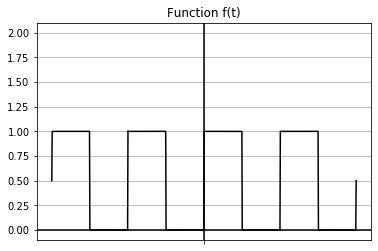

In [25]:
plt.plot(time, y, 'k', '', 2)
plt.title('Function f(t)')
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

### Approach

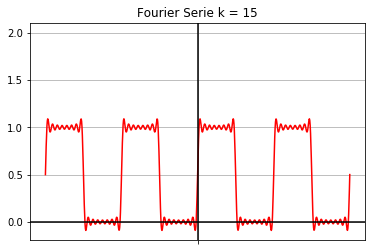

In [26]:
plt.plot(time, y_aprox, 'r', '', 2);
plt.title('Fourier Serie k = ' + str(M))
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

### Amplitude Spectrum

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


0 0.63661977
1 0.0
2 0.21220659
3 0.0
4 0.12732395
5 0.0
6 0.09094568
7 0.0
8 0.07073553
9 0.0
10 0.05787452
11 0.0
12 0.04897075
13 0.0
14 0.04244132


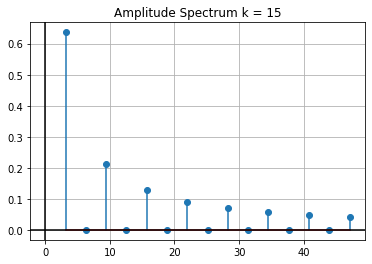

In [27]:
plt.stem(wk, an);
plt.title('Amplitude Spectrum k = ' + str(M))
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

for i in range(len(an)):
  print(i, round(an[i], 8))

### Phase Spectrum

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


0 -90.0
1 0.0
2 -90.0
3 0.0
4 -90.0
5 0.0
6 -90.0
7 0.0
8 -90.0
9 0.0
10 -90.0
11 0.0
12 -90.0
13 0.0
14 -90.0


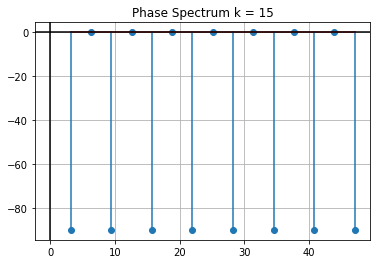

In [28]:
plt.stem(wk, phi);
plt.title('Phase Spectrum k = ' + str(M))
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

for i in range(len(phi)):
  print(i, round(phi[i], 8))